In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset en un dataframe de pandas, realizar un análisis exploratorio

tiburones = pd.read_csv('./attacks.csv')
tiburones

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N);
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,N;
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,Adyson McNeely,F,11,N;
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,N;
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M,NaN,N;
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M,NaN,N;
...,...,...,...,...,...,...,...,...,...,...
5758,2015.10.07,07-Oct-2015,2015.0,Unprovoked,AUSTRALIA,Surfing,Eli Zawadzki,M,18,N;
5759,2015.10.05.b,05-Oct-2015,2015.0,Unprovoked,USA,Body boarding,male,M,22,N;
5760,2015.10.05.a,05-Oct-2015,2015.0,Unprovoked,USA,Wading,Gregory Slaughter,M,13,N;
5761,2015.10.04,04-Oct-2015,2015.0,Unprovoked,USA,Surfing,Phillip Tarasovic,M,14,N;


In [5]:
tiburones.shape

(5763, 10)

In [4]:
tiburones.size

57630

In [7]:
tiburones.describe()

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N);
count,5762,5083,5082,5080,5047,4707,4941,4739,2992,5083
unique,5751,4432,241,9,190,1044,4222,8,130,10
top,1907.10.16.R,1957,2015.0,Unprovoked,USA,Surfing,male,M,17,N;
freq,2,7,127,4196,1868,923,462,4178,134,3827


In [8]:
tiburones.dtypes

Case Number     object
Date            object
Year            object
Type            object
Country         object
Activity        object
Name            object
Sex             object
Age             object
Fatal (Y/N);    object
dtype: object

In [10]:
tiburones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Case Number   5762 non-null   object
 1   Date          5083 non-null   object
 2   Year          5082 non-null   object
 3   Type          5080 non-null   object
 4   Country       5047 non-null   object
 5   Activity      4707 non-null   object
 6   Name          4941 non-null   object
 7   Sex           4739 non-null   object
 8   Age           2992 non-null   object
 9   Fatal (Y/N);  5083 non-null   object
dtypes: object(10)
memory usage: 450.4+ KB


In [11]:
tiburones.head(3)

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N);
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,Paddling,Julie Wolfe,F,57,N;
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Standing,Adyson McNeely,F,11,N;
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Surfing,John Denges,M,48,N;


In [12]:
tiburones.tail(3)

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N);
5760,2015.10.05.a,05-Oct-2015,2015.0,Unprovoked,USA,Wading,Gregory Slaughter,M,13,N;
5761,2015.10.04,04-Oct-2015,2015.0,Unprovoked,USA,Surfing,Phillip Tarasovic,M,14,N;
5762,2015.09.29,29-Sep-2015,2015.0,Unprovoked,USA,Surfing,David Morrison Jr.,M,22,N;


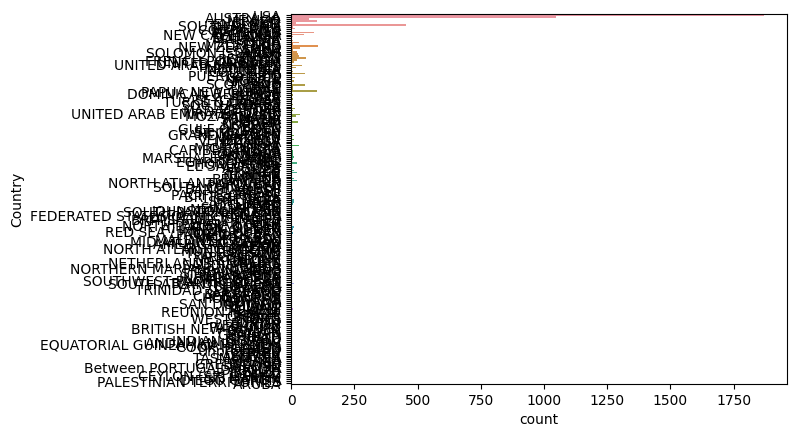

In [28]:
# Realizar un gráfico de barras para el atributo Country. ¿Cuáles son los dos países con mayor cantidad de ataque de tiburones?

sns.countplot(y='Country', data=tiburones)
plt.show()

In [31]:
tiburones['Country'].value_counts()

USA                      1868
AUSTRALIA                1046
SOUTH AFRICA              453
NEW ZEALAND               105
PAPUA NEW GUINEA          104
                         ... 
NORTH ATLANTIC OCEAN        1
MAYOTTE                     1
GABON                       1
MALDIVE ISLANDS             1
ARUBA                       1
Name: Country, Length: 190, dtype: int64

In [81]:
# Crear un nuevo dataframe shark_attacks que contenga unicamente los ataques correspondientes a los dos países del punto b

country_attacks = tiburones.Country.value_counts()[:2]

shark_attacks = pd.DataFrame(data=zip(country_attacks.index, country_attacks.values), columns=['Country', 'Attacks'])
shark_attacks

,Country,Attacks
0,USA,1868
1,AUSTRALIA,1046


<AxesSubplot:title={'center':'Grafico por Sexo'}, xlabel='Sexo', ylabel='Frecuencia'>

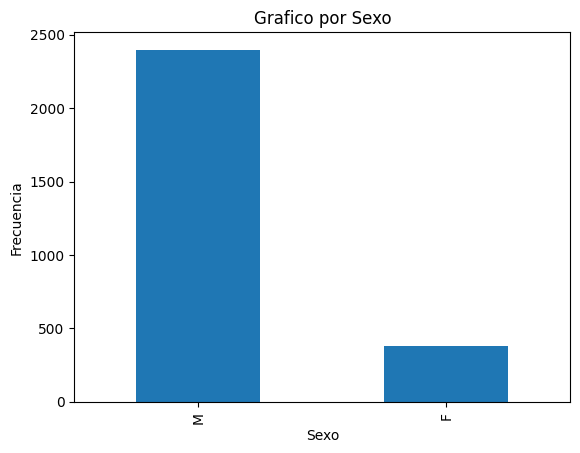

In [108]:
# La varible "Sex" debe contener únicamente los valores F, M . Eliminar los que no correspondan y también los valores faltantes.

tiburones.dropna(inplace=True)
tiburones = tiburones.drop(tiburones.query('Sex != "M" & Sex != "F"').index)
datos_por_sexo = tiburones['Sex'].value_counts()

grafico_por_sexo = datos_por_sexo.plot.bar(alpha=1, title='Grafico por Sexo', xlabel='Sexo', ylabel='Frecuencia')
grafico_por_sexo

In [167]:
# La variable "Age" debe contener únicamente valores numéricos.
# Eliminar los valores que no correspondan, reemplazar los valores faltantes por 0 y convertir el tipo de dato a entero.
tiburones.dropna(inplace=True)

for x in tiburones.index:
    if tiburones.loc[x, 'Age'] == 'nan' or tiburones.loc[x, 'Age'] == ' ' or tiburones.loc[x, 'Age'] == '':
        tiburones.loc[x, 'Age'] = 0
        continue
    if not tiburones.loc[x, 'Age'].isdigit() or ' ' in tiburones.loc[x, 'Age']:
        tiburones.drop(x, inplace = True)
    
tiburones['Age'] = tiburones['Age'].astype(int)
tiburones.Age

datos_por_edad = tiburones['Age'].value_counts()
grafico_por_edad = datos_por_edad.plot.bar(alpha=1, title='Grafico por Edad', xlabel='Edad', ylabel='Frecuencia')
grafico_por_edad

AttributeError: 'numpy.int64' object has no attribute 'isdigit'

In [146]:
# La variable Year debe contener únicamente valores del tipo AAAA (Ej: 1890,1916,etc).
# Modificar los valores y convertir el tipo de dato a entero. Hint : str.replace(...).
# Filtrar los registros desde el 1800 en adelante.

for x in tiburones.index:
    tiburones.loc[x, 'Year'] = int(y.split(".0")[0])
    if tiburones.loc[x, "Year"] < 1800:
        tiburones.drop(x, inplace = True)
        
tiburones.Year


0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
5758    2015
5759    2015
5760    2015
5761    2015
5762    2015
Name: Year, Length: 5763, dtype: object

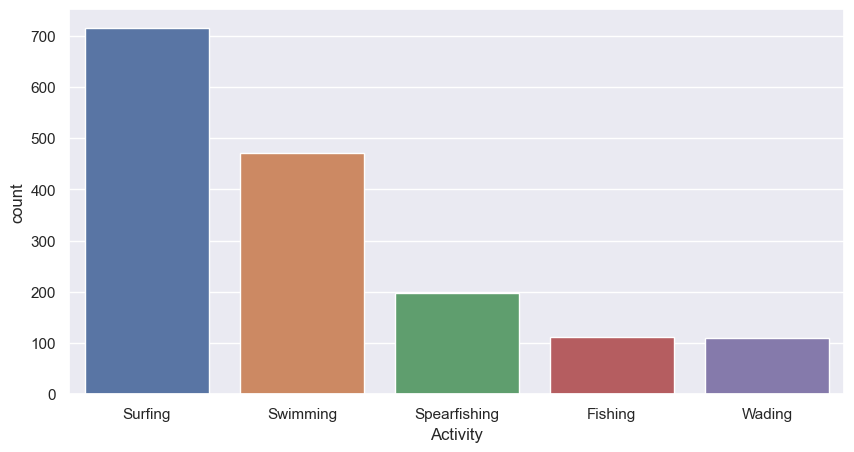

Surfing                                   716
Swimming                                  470
Spearfishing                              198
Fishing                                   111
Wading                                    109
                                         ... 
Sleeping in anchored boat                   1
Playing / jumping                           1
Scuba diving (ascending using scooter)      1
On a float                                  1
Fishing for shrimp                          1
Name: Activity, Length: 518, dtype: int64

In [177]:
# Mostrar la cantidad de observaciones para cada categoría de la variable Activity.
plt.figure(figsize=(10,5))
sns.countplot(x='Activity', data=tiburones, order=tiburones['Activity'].value_counts().iloc[:5].index)
plt.show()
# Mantener las categorias mas representativas y el resto unificarlas bajo la etiequeta Other

actividades_representativas = tiburones['Activity'].value_counts().iloc[:5]
todas_las_actividades = tiburones['Activity'].value_counts()

# Como las caregorizo?


In [115]:
# Realizar una tabla cruzada para las siguientes combinaciones de variables:

    # Country-Sex
    # Country-Type
    # Year-Sex para los últimos 10 años.
    
pd.crosstab(tiburones.Country, tiburones.Sex)
pd.crosstab(tiburones.Country, tiburones.Type)
pd.crosstab(tiburones.Year, tiburones.Sex)

Sex,F,M
Year,,
2015,381,2398


<AxesSubplot:xlabel='Sex', ylabel='Age'>

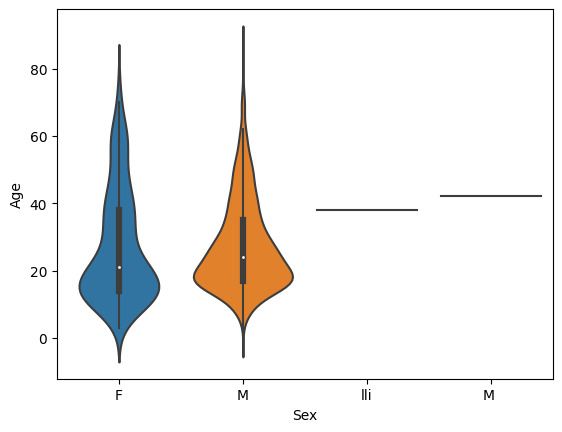

In [162]:
# Grafico de Violin: colocar en el eje horizontal la variable Sex y en el eje vertical la variable Age seleccionado sólo
# los registros donde la edad sea mayor a 0.

edad_mayor_a_cero = tiburones.drop(tiburones.query('Age < 0').index)

sns.violinplot(x=tiburones.Sex, y=edad_mayor_a_cero.Age, data=tiburones)

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

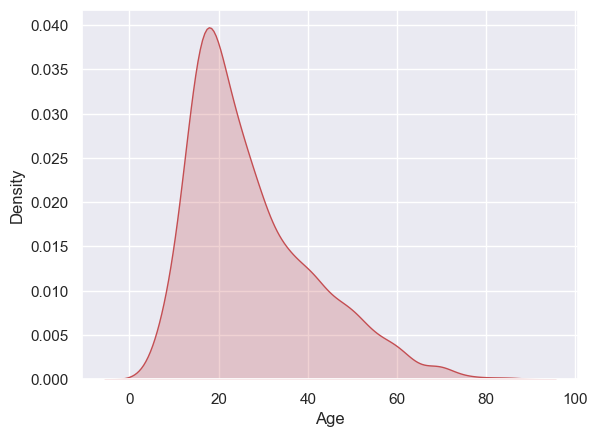

In [164]:
# Gráfico de densidad para la variable Age por sexo, seleccionado sólo los registros donde la edad sea mayor a 0.

edad_mayor_a_cero = tiburones[tiburones['Age'] > 0]

sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
sns.kdeplot(edad_mayor_a_cero['Age'], shade=True, color="r")
sns.kdeplot(tiburones['Sex'], shade=True, color="b")
plt.show()

# Arreglar esto


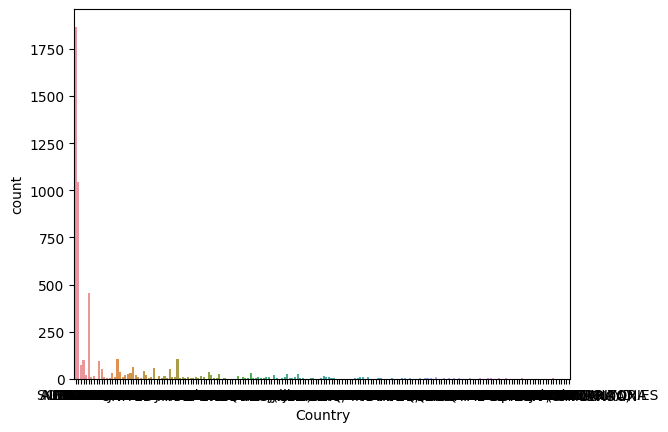

In [157]:
# Gráfico de barras con la cantidad de accidentes por año por país para los últimos 60 años.

latest_year = 0

for year in tiburones.Year:
        latest_year = year

last_sixty_years = latest_year - 60

accidentes_ultimos_sesenta_años = tiburones[tiburones['Year'] >= last_sixty_years]

sns.countplot(x=accidentes_por_año_por_pais.Country,  data=accidentes_ultimos_sesenta_años)
plt.show()